In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('/home/users/kkaminski/apps/localaln/')
sys.path.append('/home/users/kkaminski/apps/localpdb')
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import alntools as aln

/home/users/kkaminski/anaconda3/envs/emb/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def df_to_namespace(dfrow):
    _, row = next(iter(dfrow.iterrows()))
    return row

In [4]:
path_nfs = "/home/nfs/kkaminski/RTB/"
path_rtbdata = "datafull.short.p"
path_emb = "datafull.short.emb"
print('num embeddings: ', len(torch.load(path_emb)))
rtbdf = pd.read_pickle(path_rtbdata)
rtbdf['idx'] = list(range(rtbdf.shape[0]))
rtbdf.head(10)[['simplified_cofactor', 'seqlen', 'pdb_chain']]

num embeddings:  50


,simplified_cofactor,seqlen,pdb_chain
126,NAD,140,1lss_A
370,NAD,147,1lsu_B
1131,SAM,158,5bxy_A
1180,SAM,161,5fa8_A
745,SAM,170,3q87_B
648,SAM,174,3iht_A
492,FAD,180,2cvj_A
43,SAM,180,1eiz_A
675,SAM,181,3lby_A
23,NADP,184,1d4o_A


In [5]:
pdb_chain1 = "1lss_A"
pdb_chain2 = "5bxy_A"
sam = rtbdf[rtbdf.pdb_chain == pdb_chain1]
nadp = rtbdf[rtbdf.pdb_chain == pdb_chain2]

sam = df_to_namespace(sam)
nadp = df_to_namespace(nadp)

sam_emb = torch.load(path_emb)[sam.idx]
nadp_emb = torch.load(path_emb)[nadp.idx]

rtbdf[rtbdf.pdb_chain.isin([pdb_chain1, pdb_chain2])]

,new_pdb_list,pdb_chain,seq,seqres_start,seqres_end,pdb_list,ss_pos,cofactor,ade_int,rib_int,...,simplified_cofactor,is_nice,core_pdb,ss_dssp,exp_test,clust_id,class,seq_chain,seqlen,idx
126,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1lss_A,GSHGMYIIIAGIGRVGYTLAKSLSEKGHDIVLIDIDKDICK,0,41,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 11, 17, 25, 28, 35]",NAD,1,1,...,NAD,True,869_1lss_A_1_37.pdb,???? EEEEE SHHHHHHHHHHHHTT EEEEEES HHHHH,False,869,train,GSHGMYIIIAGIGRVGYTLAKSLSEKGHDIVLIDIDKDICKKASAE...,140,0
1131,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...",5bxy_A,LADVDETDVLYDLGSGDGRIVIRAARTHGARGVGIEIDPDLV,18,60,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...","[6, 13, 18, 26, 29, 36]",SAH,1,1,...,SAM,True,7950_5bxy_A_18_59.pdb,HTT TT EEEEES TTSHHHHHIIIII EEEEEES HHHH,False,6394,validation,SMVPYVPTPKPVVDRMLELADVDETDVLYDLGSGDGRIVIRAARTH...,158,2


In [6]:
# pool embeddings to make plot more visable
densitymap = aln.density.embedding_similarity(sam_emb, nadp_emb)

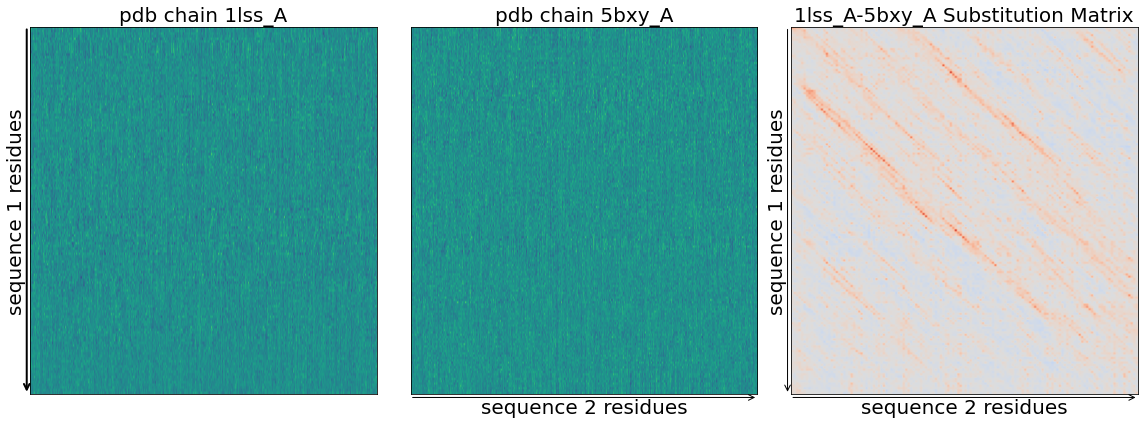

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fontsize = 20
aspect = 'auto'
arrow_dist = 0.01
arrow_color = 'black'
arrow_lw = 2
ax[0].imshow(sam_emb, aspect=aspect)
ax[0].set_ylabel('sequence 1 residues', fontsize=fontsize)
ax[1].set_xlabel('sequence 2 residues', fontsize=fontsize)
ax[2].set_ylabel('sequence 1 residues', fontsize=fontsize)
ax[2].set_xlabel('sequence 2 residues', fontsize=fontsize)
ax[0].set_xticks([], [])
ax[1].set_xticks([], [])
ax[2].set_xticks([], [])

ax[0].annotate('', xy=(-arrow_dist, 0), xycoords='axes fraction', xytext=(-arrow_dist, 1), 
            arrowprops=dict(arrowstyle="->",
             color=arrow_color,
              mutation_scale=14,
              mutation_aspect=1,
              linewidth=2))

ax[1].annotate('', xy=(0, -arrow_dist), xycoords='axes fraction', xytext=(1, -arrow_dist), 
            arrowprops=dict(arrowstyle="<-",
             color=arrow_color,
              mutation_scale=14,
              mutation_aspect=1))


ax[2].annotate('', xy=(-arrow_dist, 0), xycoords='axes fraction', xytext=(-arrow_dist, 1), 
            arrowprops=dict(arrowstyle="->",
             color=arrow_color,
              mutation_scale=14,
              mutation_aspect=1))

ax[2].annotate('', xy=(0, -arrow_dist), xycoords='axes fraction', xytext=(1, -arrow_dist), 
            arrowprops=dict(arrowstyle="<-",
             color=arrow_color,
              mutation_scale=14,
              mutation_aspect=1))

ax[1].set_yticks([], [])
ax[2].set_yticks([], [])
ax[0].set_yticks([], [])
ax[0].set_title(f'pdb chain {sam.pdb_chain}', fontsize=fontsize)
ax[1].set_title(f'pdb chain {nadp.pdb_chain}', fontsize=fontsize)
ax[2].set_title(f'{sam.pdb_chain}-{nadp.pdb_chain} Substitution Matrix', fontsize=fontsize)

#plt.xticks([], [])
#plt.xticks([], [])
ax[1].imshow(nadp_emb, aspect=aspect)
ax[2].imshow(densitymap, cmap=plt.cm.coolwarm, vmin=-0.7, vmax=0.7, aspect=aspect)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.savefig('img/emb_mx.png', dpi=200)

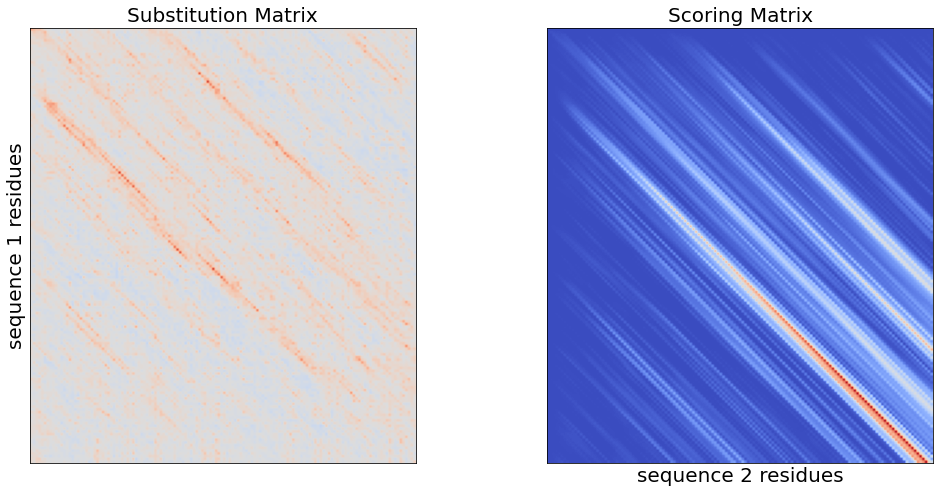

In [8]:
score_matrix = aln.fill_score_matrix(densitymap.cpu().numpy())
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
ax[0].imshow(densitymap, cmap=plt.cm.coolwarm, vmin=-0.7, vmax=0.7)
ax[0].set_ylabel('sequence 1 residues', fontsize=fontsize)
ax[1].set_xlabel('sequence 2 residues', fontsize=fontsize)
ax[0].set_xticks([], [])
ax[1].set_xticks([], [])

ax[1].set_yticks([], [])
ax[0].set_yticks([], [])
ax[0].set_title('Substitution Matrix', fontsize=fontsize)
ax[1].set_title('Scoring Matrix', fontsize=fontsize)

#plt.xticks([], [])
#plt.xticks([], [])
ax[1].imshow(score_matrix, cmap=plt.cm.coolwarm)
fig.patch.set_facecolor('white')
#fig.tight_layout()
fig.savefig('img/emb_sc.png', dpi=300)

In [9]:
arr = densitymap.numpy()
paths = aln.alignment.gather_all_paths(arr)
paths = [p - 1 for p in paths]

In [10]:
maskarr = aln.prepare.mask_like(densitymap, paths)

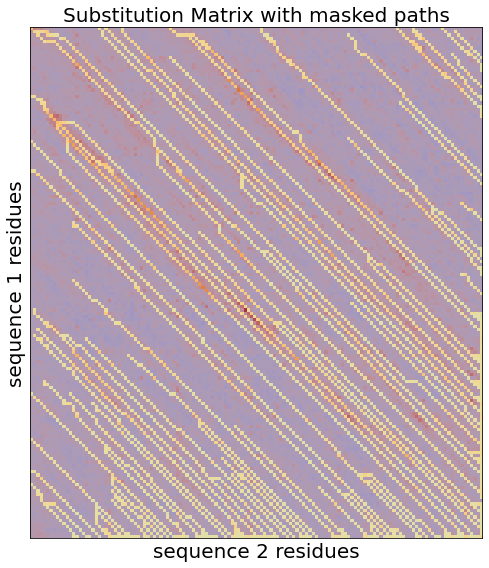

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_ylabel('sequence 1 residues', fontsize=fontsize)
ax.set_xlabel('sequence 2 residues', fontsize=fontsize)
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title('Substitution Matrix with masked paths', fontsize=fontsize)

ax.imshow(densitymap, cmap=plt.cm.coolwarm, vmin=-0.7, vmax=0.7)
ax.imshow(maskarr, alpha=0.3)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.savefig('img/emb_tracelines.png', dpi=300)

In [12]:
spans_locations = aln.prepare.search_paths(arr,
                                            paths=paths,
                                            window=20,
                                            min_span=20)
results = pd.DataFrame(spans_locations.values())
results = aln.postprocess.filter_result_dataframe(results)
results.head(3)

,pathid,spanid,span_start,span_end,indices,score,len,y1,x1
105,93,0,0,72,"[[20, -1], [20, 0], [21, 1], [21, 2], [22, 2],...",0.18,72,20,-1
24,30,0,0,61,"[[-1, 42], [0, 43], [1, 44], [1, 45], [1, 46],...",0.15,61,-1,42
116,98,1,42,84,"[[58, 31], [59, 32], [60, 33], [61, 34], [62, ...",0.14,42,58,31


In [13]:
maskarr = aln.alntools.prepare.mask_like(densitymap.T, results.indices)

AttributeError: module 'alntools' has no attribute 'alntools'

In [ ]:
array = densitymap.T.numpy()
array = array.astype(np.float32)
array -= array.mean()
array /= (array.std() + 1e-3)
arr_filled = ds.alignment.fill_score_matrix(array)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fontsize = 14
ax[0].set_ylabel('sequence 1 residues', fontsize=fontsize)
ax[1].set_ylabel('sequence 1 residues', fontsize=fontsize)
ax[0].set_xlabel('sequence 2 residues', fontsize=fontsize)
ax[1].set_xlabel('sequence 2 residues', fontsize=fontsize)
ax[0].set_xticks([], [])
ax[1].set_xticks([], [])

ax[1].set_yticks([], [])
ax[0].set_yticks([], [])
ax[0].set_title('Substitution Matrix', fontsize=fontsize)
ax[1].set_title('same with masked alignments indices', fontsize=fontsize)

#plt.xticks([], [])
#plt.xticks([], [])
ax[0].imshow(densitymap.T, cmap=plt.cm.coolwarm, vmin=-0.7, vmax=0.7)
ax[1].imshow(densitymap.T, cmap=plt.cm.coolwarm, vmin=-0.7, vmax=0.7)
ax[1].imshow(maskarr, alpha=0.4, cmap=plt.cm.coolwarm)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.savefig('img/emb_traceback.png', dpi=300)

In [ ]:
# calculate core overlap
res = list()
for idx, sample in results.iterrows():
    aln_list = results.indices.apply(np.asarray).tolist()
    #indices = aln.postprocess.filter_aln(aln_list)
    alnpaths = results['indices'].tolist()
    alnpaths = [np.asarray(aln) for aln in alnpaths]

    record = aln.alntools.postprocess.measure_aln_overlap_with_pdblist(
                            seq1_true=nadp.new_pdb_list,
                            seq2_true=sam.new_pdb_list,
                            alignment=sample.indices)
    if record is not None:
        record['index'] = idx
        record['path score'] = sample.score
        record['path len'] = sample.len
        res.append(record)
res = pd.DataFrame(res)

res['seq_core_cover'] = res['seq1_core_cover']*res['seq2_core_cover']

In [ ]:
res=res.drop_duplicates(subset=['seq_core_cover'])
res.nlargest(5, columns=['seq_core_cover']).head(5).round(3)

In [ ]:
bestaln = results.iloc[0, ]

In [ ]:
aln.alntools.alignment.draw_alignment(bestaln.indices, nadp.seq_chain, sam.seq_chain)

In [ ]:
bestaln

In [ ]:
window = 10
min_span = 10
mask_v2 = np.zeros_like(arr)
span_list = list()
span_dict = dict()
print('num paths: ', mask_v2.shape[0])
spans_locations = dict()
for ipath, path in enumerate(paths):
    diag_ind = np.asarray(path)
    y, x = diag_ind[:, 0].ravel(), diag_ind[:, 1].ravel()
    pathvals = arr[y, x].ravel().tolist()
    line_mean, line_std = aln.alntools.prepare.gauss_it(pathvals, window=window)
    spans, vp_indices = aln.alntools.prepare.find_validpoints2(line_mean, line_std)
    arr_indices = [(y[k], x[k]) for k in vp_indices]
    if len(spans) > 0:
        for idx, (start, stop) in enumerate(spans):
            if stop - start < min_span:
                continue
            keyid = f'{ipath}_{idx}'
            spans_locations[ipath] = {
                'pathid': ipath,
                'spans': (start, stop),
                'values': np.mean([pathvals[j] for j in vp_indices]),
                'indices': arr_indices,
                'vpoints': vp_indices,
                'means' : line_mean,
                'score' : np.mean(pathvals),
                "len" : stop - start
            }
    #spans = find_spans(valid_points)
    #span_list.extend(spans)
    for start, stop in spans:
        if stop - start < min_span:
            continue
        yi = y[start:stop+1]
        xi = x[start:stop+1]
        mask_v2[yi, xi] = 1
results = pd.DataFrame(spans_locations.values())
results = results.sort_values(by=['len', 'values'], ascending=False)

for idx1, row1 in results.iterrows():
    for idx2, row2 in results.iterrows():
        pass

In [ ]:
results